Tree-of-Thoughts (ToT) [@yao2023tree] is a framework for LLM inference. It allows  models to explore multiple reasoning paths and make deliberate decisions for problem solving. ToT generalizes over the Chain-of-Thought (CoT) approach and enables LLMs to generate and evaluate thoughts, which are coherent units of text, as intermediate steps toward a final solution. It organizes thoughts into a data structure of branching tree based on  an evaluation score of a thought. Thoughts could be,
- a question
- a hypothesis
- a plan
- a partial solution
- any texts that help models to solve the problem

<div style="text-align: center;">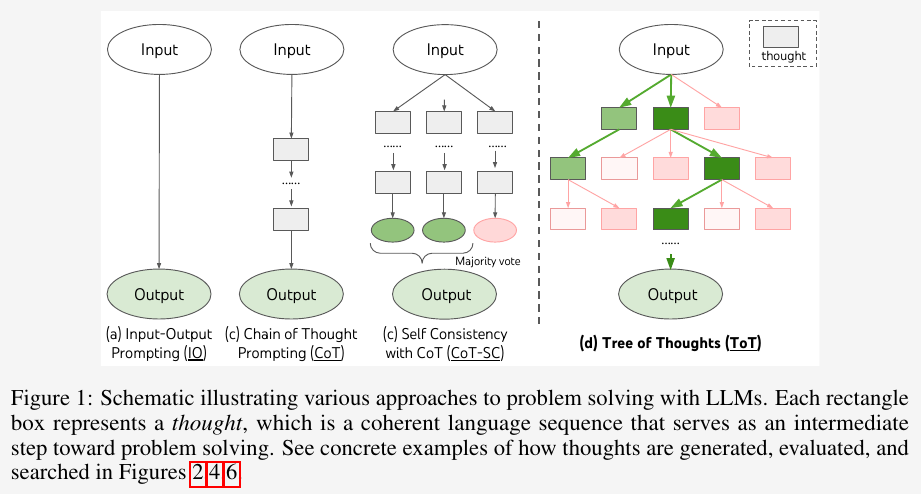{.preview-image}
<br/>Image source: Yao et al. [@yao2023tree]
</div>

The paper demonstrates that ToT significantly improves the performance of LLMs on three  tasks that require non-trivial planning or search: Game of 24, Creative Writing, and Mini Crosswords.

## How does it work?
ToT employs a tree-based search method to solve a problem. Each tree node is a state $s = [x, z_{1···i} ]$ that consists of the input and the sequence of thoughts generated until that point. This way, ToT can explore different reasoning paths and find the best solution for the given problem.

ToT follows the following steps:

- use a thought generator to generate thoughts for a tree node. Each thought should be not too "big" and not too "small".
  - for rich thought space: sample i.i.d. thoughts from a CoT prompt because i.i.d. samples lead to diversity
  - for more constrained thought space: propose thoughts sequentially by a propose prompt, which could avoid duplication
- use a state evaluator as a heuristic for the search algorithm
  - evaluate the frontier states based on one of the following two strategies:
    - value each state independently
    - vote across states
- use a search algorithm, e.g. BFS or DFS, to traverse through the tree
  - select the most promising child node at each level, and generating new thoughts from it
    - Breadth-first search (BFS): maintains a set of the most promising states per step
      - for tasks where the tree depth is limited and initial thought steps can be evaluated and pruned to a small set
    - Depth-first search (DFS): picks the most promising state first, until reaching the final output or a dead-end; It backtracks to the parent state to continue exploration
